In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid', font_scale=1.5)
sns.set_palette('Set2', n_colors=10)
plt.rc('font', family='malgun gothic')
plt.rc('axes', unicode_minus=False)

import streamlit as st
from datetime import date

In [3]:
bss = pd.read_csv('국세청_사업자현황_100대 생활업종_20220228.csv',encoding='euc-kr')
gen = pd.read_csv('국세청_사업자현황_성별_20220228.csv', encoding='euc-kr')
age = pd.read_csv('국세청_사업자현황_연령별_20220228.csv', encoding='euc-kr')
yea = pd.read_csv('국세청_사업자현황_존속연수별_20220228.csv', encoding='euc-kr')

In [4]:
bss

,업종,시도,시군구,당월,전월,전년동월
0,LPG 충전소,서울특별시,중구,0,0,*
1,LPG 충전소,서울특별시,성동구,*,*,*
2,LPG 충전소,서울특별시,광진구,*,*,*
3,LPG 충전소,서울특별시,동대문구,4,4,4
4,LPG 충전소,서울특별시,중랑구,4,4,4
...,...,...,...,...,...,...
23859,휴대폰가게,경상남도,함양군,11,11,11
23860,휴대폰가게,경상남도,거창군,28,28,28
23861,휴대폰가게,경상남도,합천군,8,8,8
23862,휴대폰가게,제주특별자치도,제주시,201,201,201


In [5]:
bss_seoul = bss[bss['시도'] == '서울특별시']

In [6]:
bss_seoul = bss_seoul.replace('*', np.nan)

In [7]:
bss_seoul.fillna(0, inplace = True)

In [8]:
bss_seoul['업종'].unique()

array(['LPG 충전소', 'PC방', '가구점', '가전제품수리점', '가전제품판매점', '간이주점', '간판광고물업',
       '감정평가사', '건강보조식품가게', '건어물가게', '건축사', '결혼상담소', '곡물가게', '공인노무사',
       '공인회계사', '과일가게', '교습소ㆍ공부방', '교습학원', '구내식당', '기술및직업훈련학원', '기술사',
       '기타 일반의원', '기타외국식전문점', '기타음식점', '꽃가게', '내과ㆍ소아과 의원', '노래방', '담배가게',
       '당구장', '독서실', '동물병원', '목욕탕', '문구점', '미용실', '법무사', '변리사', '변호사',
       '부동산중개업', '분식점', '사진촬영업', '산부인과 의원', '생선가게', '서점', '성형외과 의원',
       '세무사', '세탁소', '슈퍼마켓', '스포츠교육기관', '스포츠시설운영업', '스포츠용품점', '시계ㆍ귀금속점',
       '식료품가게', '신경정신과 의원', '신발가게', '실내스크린골프점', '실내장식가게', '실외골프연습장',
       '안경점', '안과 의원', '애완용품점', '약국', '여관ㆍ모텔', '여행사', '예술학원', '예식장',
       '옷가게', '의료용품가게', '이륜자동차판매점', '이발소', '이비인후과 의원', '일반외과 의원', '일식전문점',
       '자동차수리점', '자전거판매점', '장난감가게', '정육점', '제과점', '종합병원', '주유소', '주차장운영업',
       '중고차판매점', '중식전문점', '채소가게', '철물점', '치과병원ㆍ의원', '침구ㆍ커튼가게', '커피음료점',
       '컴퓨터판매점', '통신판매업', '패스트푸드점', '펜션ㆍ게스트하우스', '편의점', '피부관리업',
       '피부ㆍ비뇨기과 의원', '한방병원ㆍ한의원', '한식전문점', '헬스클럽', '호프전문점', '화장품가게',
       

In [9]:
# 100가지의 업종을 '자영업'과 자영업이 아닌것으로 구분하기
lst = list(bss_seoul['업종'].unique())
lst1 = pd.DataFrame(lst)
print(lst1)

          0
0   LPG 충전소
1       PC방
2       가구점
3   가전제품수리점
4   가전제품판매점
..      ...
95    한식전문점
96     헬스클럽
97    호프전문점
98    화장품가게
99    휴대폰가게

[100 rows x 1 columns]


In [10]:
# lst1.to_excel("업종.xlsx")

In [11]:
lst

['LPG 충전소',
 'PC방',
 '가구점',
 '가전제품수리점',
 '가전제품판매점',
 '간이주점',
 '간판광고물업',
 '감정평가사',
 '건강보조식품가게',
 '건어물가게',
 '건축사',
 '결혼상담소',
 '곡물가게',
 '공인노무사',
 '공인회계사',
 '과일가게',
 '교습소ㆍ공부방',
 '교습학원',
 '구내식당',
 '기술및직업훈련학원',
 '기술사',
 '기타 일반의원',
 '기타외국식전문점',
 '기타음식점',
 '꽃가게',
 '내과ㆍ소아과 의원',
 '노래방',
 '담배가게',
 '당구장',
 '독서실',
 '동물병원',
 '목욕탕',
 '문구점',
 '미용실',
 '법무사',
 '변리사',
 '변호사',
 '부동산중개업',
 '분식점',
 '사진촬영업',
 '산부인과 의원',
 '생선가게',
 '서점',
 '성형외과 의원',
 '세무사',
 '세탁소',
 '슈퍼마켓',
 '스포츠교육기관',
 '스포츠시설운영업',
 '스포츠용품점',
 '시계ㆍ귀금속점',
 '식료품가게',
 '신경정신과 의원',
 '신발가게',
 '실내스크린골프점',
 '실내장식가게',
 '실외골프연습장',
 '안경점',
 '안과 의원',
 '애완용품점',
 '약국',
 '여관ㆍ모텔',
 '여행사',
 '예술학원',
 '예식장',
 '옷가게',
 '의료용품가게',
 '이륜자동차판매점',
 '이발소',
 '이비인후과 의원',
 '일반외과 의원',
 '일식전문점',
 '자동차수리점',
 '자전거판매점',
 '장난감가게',
 '정육점',
 '제과점',
 '종합병원',
 '주유소',
 '주차장운영업',
 '중고차판매점',
 '중식전문점',
 '채소가게',
 '철물점',
 '치과병원ㆍ의원',
 '침구ㆍ커튼가게',
 '커피음료점',
 '컴퓨터판매점',
 '통신판매업',
 '패스트푸드점',
 '펜션ㆍ게스트하우스',
 '편의점',
 '피부관리업',
 '피부ㆍ비뇨기과 의원',
 '한방병원ㆍ한의원',
 '한식전문점',
 '헬스클럽',
 '호프전문점',
 '화장품가게',
 '휴대폰가

In [12]:
types = ['LPG 충전소',
 'PC방',
 '가구점',
 '가전제품수리점',
 '가전제품판매점',
 '간이주점',
 '간판광고물업',
 '건어물가게',
 '곡물가게',
 '과일가게',
 '교습소ㆍ공부방',
 '교습학원',
 '기타음식점',
 '꽃가게',
 '노래방',
 '당구장',
 '독서실',
 '목욕탕',
 '문구점',
 '미용실',
 '부동산중개업',
 '분식점',
 '사진촬영업',
 '생선가게',
 '서점',
 '세탁소',
 '슈퍼마켓',
 '스포츠시설운영업',
 '스포츠용품점',
 '시계ㆍ귀금속점',
 '식료품가게',
 '신발가게',
 '실내스크린골프점',
 '실내장식가게',
 '실외골프연습장',
 '안경점',
 '애완용품점',
 '여관ㆍ모텔',
 '여행사',
 '예식장',
 '옷가게',
 '이륜자동차판매점',
 '이발소',
 '일식전문점',
 '자동차수리점',
 '자전거판매점',
 '장난감가게',
 '정육점',
 '제과점',
 '주유소',
 '주차장운영업',
 '중고차판매점',
 '중식전문점',
 '채소가게',
 '철물점',
 '침구ㆍ커튼가게',
 '커피음료점',
 '컴퓨터판매점',
 '통신판매업',
 '패스트푸드점',
 '펜션ㆍ게스트하우스',
 '편의점',
 '피부관리업',
 '한식전문점',
 '헬스클럽',
 '호프전문점',
 '화장품가게',
 '휴대폰가게']
bss_filter = bss_seoul.loc[bss_seoul['업종'].isin(types)]
bss_filter

,업종,시도,시군구,당월,전월,전년동월
0,LPG 충전소,서울특별시,중구,0,0,0
1,LPG 충전소,서울특별시,성동구,0,0,0
2,LPG 충전소,서울특별시,광진구,0,0,0
3,LPG 충전소,서울특별시,동대문구,4,4,4
4,LPG 충전소,서울특별시,중랑구,4,4,4
...,...,...,...,...,...,...
23634,휴대폰가게,서울특별시,관악구,136,135,139
23635,휴대폰가게,서울특별시,서초구,124,123,118
23636,휴대폰가게,서울특별시,강남구,176,178,175
23637,휴대폰가게,서울특별시,송파구,169,166,179


In [13]:
bss_seoul['당월'] = bss_seoul['당월'].astype(int)

In [14]:
bss_seoul_2 = bss_seoul.groupby('업종')[['당월']].sum()
bss_seoul2 = bss_seoul_2.sort_values(by='당월', ascending=False)
bss_seoul2.head(60)

,당월
업종,
통신판매업,128659
한식전문점,55049
부동산중개업,35040
미용실,18639
실내장식가게,15785
커피음료점,15717
옷가게,15621
교습학원,10927
분식점,10772


In [15]:
gen

,업태별,시도,시군구,성별,(전체)당월,(전체)전월,(전체)전년동월,(개인)당월,(개인)전월,(개인)전년동월,(법인)당월,(법인)전월,(법인)전년동월
0,농·임·어업,서울특별시,종로구,남자,15,14,13,5,4,3,10,10,10
1,농·임·어업,서울특별시,종로구,여자,4,4,*,*,*,*,3,3,*
2,농·임·어업,서울특별시,중구,남자,13,13,11,*,*,*,12,12,10
3,농·임·어업,서울특별시,중구,여자,*,*,*,0,0,*,*,*,*
4,농·임·어업,서울특별시,용산구,남자,7,7,5,*,*,*,5,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8421,서비스업(기타포함),제주특별자치도,제주시,여자,7945,7878,7091,7293,7237,6565,652,641,526
8422,서비스업(기타포함),제주특별자치도,제주시,미상,19,19,17,13,13,11,6,6,6
8423,서비스업(기타포함),제주특별자치도,서귀포시,남자,3498,3476,3215,2804,2788,2611,694,688,604
8424,서비스업(기타포함),제주특별자치도,서귀포시,여자,2647,2605,2366,2478,2440,2222,169,165,144


In [16]:
gen_capital = gen.query("시도 == '서울특별시' or 시도 == '경기도'")

In [17]:
gen_capital

,업태별,시도,시군구,성별,(전체)당월,(전체)전월,(전체)전년동월,(개인)당월,(개인)전월,(개인)전년동월,(법인)당월,(법인)전월,(법인)전년동월
0,농·임·어업,서울특별시,종로구,남자,15,14,13,5,4,3,10,10,10
1,농·임·어업,서울특별시,종로구,여자,4,4,*,*,*,*,3,3,*
2,농·임·어업,서울특별시,중구,남자,13,13,11,*,*,*,12,12,10
3,농·임·어업,서울특별시,중구,여자,*,*,*,0,0,*,*,*,*
4,농·임·어업,서울특별시,용산구,남자,7,7,5,*,*,*,5,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7938,서비스업(기타포함),경기도,가평군,여자,728,721,661,642,635,582,86,86,79
7939,서비스업(기타포함),경기도,가평군,미상,*,*,*,0,0,*,*,*,*
7940,서비스업(기타포함),경기도,양평군,남자,2538,2517,2286,2033,2017,1831,505,500,455
7941,서비스업(기타포함),경기도,양평군,여자,1566,1556,1367,1380,1370,1214,186,186,153


In [18]:
gen_capital = gen_capital.replace('*', np.nan)

In [19]:
gen_capital.fillna(0, inplace=True)

In [20]:
gen_capital['(전체)당월'] = gen_capital['(전체)당월'].astype(int)

In [21]:
pd.pivot_table(gen_capital, 
               values='(전체)당월', 
               index='업태별', 
               columns='시도', 
               aggfunc='sum')

시도,경기도,서울특별시
업태별,,
건설업,143718,82546
광업,108,80
농·임·어업,14592,699
"대리,중개,도급업",24777,20031
도매업,177294,172830
부동산매매업,25990,12778
부동산임대업,753122,615480
서비스업(기타포함),503186,485620
소매업,327338,256842


In [22]:
gen_capital['시도'].unique()

array(['서울특별시', '경기도'], dtype=object)

In [23]:
gen_capital

,업태별,시도,시군구,성별,(전체)당월,(전체)전월,(전체)전년동월,(개인)당월,(개인)전월,(개인)전년동월,(법인)당월,(법인)전월,(법인)전년동월
0,농·임·어업,서울특별시,종로구,남자,15,14,13,5,4,3,10,10,10
1,농·임·어업,서울특별시,종로구,여자,4,4,0,0,0,0,3,3,0
2,농·임·어업,서울특별시,중구,남자,13,13,11,0,0,0,12,12,10
3,농·임·어업,서울특별시,중구,여자,0,0,0,0,0,0,0,0,0
4,농·임·어업,서울특별시,용산구,남자,7,7,5,0,0,0,5,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7938,서비스업(기타포함),경기도,가평군,여자,728,721,661,642,635,582,86,86,79
7939,서비스업(기타포함),경기도,가평군,미상,0,0,0,0,0,0,0,0,0
7940,서비스업(기타포함),경기도,양평군,남자,2538,2517,2286,2033,2017,1831,505,500,455
7941,서비스업(기타포함),경기도,양평군,여자,1566,1556,1367,1380,1370,1214,186,186,153


In [24]:
gen_capital2 = gen_capital[gen_capital['업태별'] == '농·임·어업']
gen_capital2

,업태별,시도,시군구,성별,(전체)당월,(전체)전월,(전체)전년동월,(개인)당월,(개인)전월,(개인)전년동월,(법인)당월,(법인)전월,(법인)전년동월
0,농·임·어업,서울특별시,종로구,남자,15,14,13,5,4,3,10,10,10
1,농·임·어업,서울특별시,종로구,여자,4,4,0,0,0,0,3,3,0
2,농·임·어업,서울특별시,중구,남자,13,13,11,0,0,0,12,12,10
3,농·임·어업,서울특별시,중구,여자,0,0,0,0,0,0,0,0,0
4,농·임·어업,서울특별시,용산구,남자,7,7,5,0,0,0,5,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,농·임·어업,경기도,가평군,남자,252,248,234,181,177,167,71,71,67
158,농·임·어업,경기도,가평군,여자,52,52,47,38,38,31,14,14,16
159,농·임·어업,경기도,양평군,남자,507,505,463,339,337,310,168,168,153
160,농·임·어업,경기도,양평군,여자,139,136,101,91,88,66,48,48,35


In [25]:
gen_capital3 = gen_capital2.groupby('시군구')['(전체)당월'].sum()
gen_capital3.sort_values(ascending=False)

시군구
화성시    1743
포천시    1092
안성시     987
이천시     939
파주시     892
       ... 
도봉구      12
성동구      11
성북구      10
동작구       9
강북구       8
Name: (전체)당월, Length: 67, dtype: int32

In [26]:
pd.pivot_table(gen_capital, 
               values='(전체)당월', 
               index='업태별',
               columns='시군구', 
               aggfunc='sum')

시군구,가평군,강남구,강동구,강북구,강서구,고양시 덕양구,고양시 일산동구,고양시 일산서구,과천시,관악구,...,의정부시,이천시,종로구,중구,중랑구,파주시,평택시,포천시,하남시,화성시
업태별,,,,,,,,,,,,,,,,,,,,,
건설업,1175.0,4455.0,3404.0,2089.0,3971.0,3834.0,3998.0,1831.0,362.0,3345.0,...,4707.0,3844.0,877.0,842.0,5388.0,6253.0,9192.0,2628.0,2612.0,8920.0
광업,9.0,20.0,3.0,NaN,4.0,0.0,0.0,NaN,NaN,4.0,...,0.0,0.0,8.0,4.0,0.0,5.0,4.0,16.0,0.0,19.0
농·임·어업,304.0,94.0,43.0,8.0,32.0,390.0,178.0,167.0,224.0,18.0,...,64.0,939.0,19.0,13.0,19.0,892.0,843.0,1092.0,143.0,1743.0
"대리,중개,도급업",64.0,2209.0,874.0,365.0,1003.0,710.0,1035.0,598.0,60.0,525.0,...,751.0,546.0,326.0,1312.0,276.0,821.0,887.0,245.0,876.0,1111.0
도매업,672.0,15813.0,4421.0,2274.0,7756.0,5572.0,6713.0,3464.0,1353.0,2907.0,...,3982.0,2317.0,12536.0,23916.0,3306.0,6034.0,5682.0,3132.0,7177.0,13585.0
부동산매매업,333.0,2888.0,341.0,155.0,509.0,406.0,356.0,225.0,80.0,334.0,...,390.0,403.0,323.0,418.0,197.0,1631.0,1283.0,319.0,300.0,2988.0
부동산임대업,2098.0,57259.0,21295.0,9854.0,40716.0,32606.0,25220.0,15089.0,4797.0,18123.0,...,16984.0,9600.0,24836.0,43826.0,13037.0,25979.0,37232.0,7315.0,27426.0,62304.0
서비스업(기타포함),2161.0,70470.0,14787.0,8646.0,23526.0,17790.0,14909.0,9949.0,2673.0,14620.0,...,15285.0,6501.0,13859.0,16855.0,10647.0,16100.0,22243.0,4872.0,15137.0,37642.0
소매업,1736.0,19972.0,10519.0,7194.0,13831.0,11303.0,9887.0,7468.0,1586.0,10552.0,...,11893.0,4792.0,8771.0,10628.0,8747.0,12238.0,12917.0,4435.0,8858.0,18767.0


In [27]:
age

,업태별,시도,시군구,연령별,(전체)당월,(전체)전월,(전체)전년동월,(개인)당월,(개인)전월,(개인)전년동월,(법인)당월,(법인)전월,(법인)전년동월
0,농·임·어업,서울특별시,종로구,30세 이상,3,3,3,*,*,*,*,*,*
1,농·임·어업,서울특별시,종로구,40세 이상,3,3,*,0,0,*,3,3,*
2,농·임·어업,서울특별시,종로구,50세 이상,*,*,*,*,*,*,*,*,*
3,농·임·어업,서울특별시,종로구,60세 이상,7,7,5,3,3,*,4,4,3
4,농·임·어업,서울특별시,종로구,70세 이상,4,4,3,*,*,*,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21465,서비스업(기타포함),제주특별자치도,서귀포시,40세 이상,1947,1917,1765,1704,1674,1556,243,243,209
21466,서비스업(기타포함),제주특별자치도,서귀포시,50세 이상,1811,1795,1646,1508,1496,1371,303,299,275
21467,서비스업(기타포함),제주특별자치도,서귀포시,60세 이상,964,967,888,791,797,737,173,170,151
21468,서비스업(기타포함),제주특별자치도,서귀포시,70세 이상,270,269,214,211,211,172,59,58,42


In [28]:
yea

,업태별,시도,시군구,존속연수별,(전체)당월,(전체)전월,(전체)전년동월,(개인)당월,(개인)전월,(개인)전년동월,(법인)당월,(법인)전월,(법인)전년동월
0,농·임·어업,서울특별시,종로구,6개월 미만,3,*,*,*,*,*,*,*,*
1,농·임·어업,서울특별시,종로구,6개월 이상,*,*,*,*,*,*,0,0,*
2,농·임·어업,서울특별시,종로구,1년 이상,*,*,*,*,*,*,*,*,*
3,농·임·어업,서울특별시,종로구,2년 이상,*,*,*,0,0,*,*,*,*
4,농·임·어업,서울특별시,종로구,3년 이상,*,*,3,*,*,*,*,*,*
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29177,서비스업(기타포함),제주특별자치도,서귀포시,3년 이상,1106,1115,1031,980,990,924,126,125,107
29178,서비스업(기타포함),제주특별자치도,서귀포시,5년 이상,1262,1230,932,1083,1049,790,179,181,142
29179,서비스업(기타포함),제주특별자치도,서귀포시,10년 이상,758,746,700,661,655,620,97,91,80
29180,서비스업(기타포함),제주특별자치도,서귀포시,20년 이상,387,392,373,301,305,283,86,87,90


In [29]:
yea_seoul = yea.query("시도 == '서울특별시'")

In [30]:
yea_seoul = yea_seoul.replace('*', np.nan)

In [31]:
yea_seoul.fillna(0, inplace = True)

In [32]:
yea_seoul.drop(['(전체)당월','(전체)전월','(전체)전년동월','(법인)당월','(법인)전월', '(법인)전년동월'], axis =1, inplace = True) 

In [33]:
yea_seoul['(개인)당월'] = yea_seoul['(개인)당월'].astype(int)
yea_seoul['(개인)전월'] = yea_seoul['(개인)전월'].astype(int)
yea_seoul['(개인)전년동월'] = yea_seoul['(개인)전년동월'].astype(int)

In [34]:
yea_seoul

,업태별,시도,시군구,존속연수별,(개인)당월,(개인)전월,(개인)전년동월
0,농·임·어업,서울특별시,종로구,6개월 미만,0,0,0
1,농·임·어업,서울특별시,종로구,6개월 이상,0,0,0
2,농·임·어업,서울특별시,종로구,1년 이상,0,0,0
3,농·임·어업,서울특별시,종로구,2년 이상,0,0,0
4,농·임·어업,서울특별시,종로구,3년 이상,0,0,0
...,...,...,...,...,...,...,...
27152,서비스업(기타포함),서울특별시,강동구,3년 이상,1913,1910,1779
27153,서비스업(기타포함),서울특별시,강동구,5년 이상,2659,2630,2365
27154,서비스업(기타포함),서울특별시,강동구,10년 이상,2203,2197,2039
27155,서비스업(기타포함),서울특별시,강동구,20년 이상,734,726,665


In [35]:
yea_seoul = yea_seoul.groupby(['업태별','존속연수별'])[['(개인)당월','(개인)전월','(개인)전년동월']].sum()
yea_seoul

(개인)당월  (개인)전월  (개인)전년동월
업태별 존속연수별                           
건설업 10년 이상   12771   12723     12388
    1년 이상     6565    6622      6627
    20년 이상    6887    6822      6343
    2년 이상     5694    5618      6027
    30년 이상     482     461       342
...            ...     ...       ...
제조업 30년 이상    1972    1928      1571
    3년 이상     8449    8422      8213
    5년 이상    15213   15168     14710
    6개월 미만    2588    2663      3236
    6개월 이상    2875    2858      2878

[126 rows x 3 columns]

In [36]:
bss_filter

,업종,시도,시군구,당월,전월,전년동월
0,LPG 충전소,서울특별시,중구,0,0,0
1,LPG 충전소,서울특별시,성동구,0,0,0
2,LPG 충전소,서울특별시,광진구,0,0,0
3,LPG 충전소,서울특별시,동대문구,4,4,4
4,LPG 충전소,서울특별시,중랑구,4,4,4
...,...,...,...,...,...,...
23634,휴대폰가게,서울특별시,관악구,136,135,139
23635,휴대폰가게,서울특별시,서초구,124,123,118
23636,휴대폰가게,서울특별시,강남구,176,178,175
23637,휴대폰가게,서울특별시,송파구,169,166,179


In [37]:
bss_filter['당월'] = bss_filter['당월'].astype(int)
bss_filter['전월'] = bss_filter['전월'].astype('int')
bss_filter['전년동월'] = bss_filter['전년동월'].astype('int')

C:\Users\user\AppData\Local\Temp\ipykernel_6072\1586345723.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bss_filter['당월'] = bss_filter['당월'].astype(int)
C:\Users\user\AppData\Local\Temp\ipykernel_6072\1586345723.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bss_filter['전월'] = bss_filter['전월'].astype('int')
C:\Users\user\AppData\Local\Temp\ipykernel_6072\1586345723.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [38]:
bss_filter = bss_filter.groupby(['업종','시도'])[['당월','전월','전년동월']].sum()
bss_filter

,,당월,전월,전년동월
업종,시도,,,
LPG 충전소,서울특별시,70,70,69
PC방,서울특별시,1418,1422,1540
가구점,서울특별시,1064,1064,1035
가전제품수리점,서울특별시,3055,3021,2874
가전제품판매점,서울특별시,1580,1584,1553
...,...,...,...,...
한식전문점,서울특별시,55049,54999,55077
헬스클럽,서울특별시,2496,2450,2118
호프전문점,서울특별시,5337,5353,5840


In [39]:
bss_filter = bss_filter.reset_index(drop = False)

In [40]:
bss_filter = bss_filter.drop(['시도'], axis=1);bss_filter

,업종,당월,전월,전년동월
0,LPG 충전소,70,70,69
1,PC방,1418,1422,1540
2,가구점,1064,1064,1035
3,가전제품수리점,3055,3021,2874
4,가전제품판매점,1580,1584,1553
...,...,...,...,...
63,한식전문점,55049,54999,55077
64,헬스클럽,2496,2450,2118
65,호프전문점,5337,5353,5840
66,화장품가게,6795,6718,6546


In [41]:
bss_filter['증감%'] = ((bss_filter['당월'] - bss_filter['전년동월'])/bss_filter['전년동월'])*100 

In [42]:
bss_filter = bss_filter.set_index('업종', drop=True)

In [43]:
bss_filter

,당월,전월,전년동월,증감%
업종,,,,
LPG 충전소,70,70,69,1.449275
PC방,1418,1422,1540,-7.922078
가구점,1064,1064,1035,2.801932
가전제품수리점,3055,3021,2874,6.297843
가전제품판매점,1580,1584,1553,1.738571
...,...,...,...,...
한식전문점,55049,54999,55077,-0.050838
헬스클럽,2496,2450,2118,17.847025
호프전문점,5337,5353,5840,-8.613014


In [44]:
bss_percent = bss_filter[['증감%']].reset_index()
# bss_percent.head(10)
bss_percent

,업종,증감%
0,LPG 충전소,1.449275
1,PC방,-7.922078
2,가구점,2.801932
3,가전제품수리점,6.297843
4,가전제품판매점,1.738571
...,...,...
63,한식전문점,-0.050838
64,헬스클럽,17.847025
65,호프전문점,-8.613014
66,화장품가게,3.803850


In [52]:
b = bss_percent.sort_values(by='증감%', ascending = False)

In [53]:
b.head(20)

,업종,증감%
32,실내스크린골프점,20.405405
64,헬스클럽,17.847025
58,통신판매업,17.800179
56,커피음료점,14.463622
36,애완용품점,13.150289
62,피부관리업,12.507740
27,스포츠시설운영업,12.436762
48,제과점,12.220174
22,사진촬영업,12.148029
28,스포츠용품점,11.456954


In [86]:
a = bss_seoul[bss_seoul['업종'] == '실내장식가게']

In [87]:
a

,업종,시도,시군구,당월,전월,전년동월
12905,실내장식가게,서울특별시,종로구,248,244,242
12906,실내장식가게,서울특별시,중구,273,272,259
12907,실내장식가게,서울특별시,용산구,416,414,366
12908,실내장식가게,서울특별시,성동구,475,477,474
12909,실내장식가게,서울특별시,광진구,534,527,507
12910,실내장식가게,서울특별시,동대문구,466,465,439
12911,실내장식가게,서울특별시,중랑구,693,679,623
12912,실내장식가게,서울특별시,성북구,463,460,419
12913,실내장식가게,서울특별시,강북구,520,514,465
12914,실내장식가게,서울특별시,도봉구,515,512,483


In [45]:
bss_percent.iloc[-1::-1]

,증감%
업종,
휴대폰가게,-0.408677
화장품가게,3.803850
호프전문점,-8.613014
헬스클럽,17.847025
피부관리업,12.507740
...,...
가전제품판매점,1.738571
가전제품수리점,6.297843
가구점,2.801932


In [46]:
bss_t = bss_filter.transpose();bss_t

업종,LPG 충전소,PC방,가구점,가전제품수리점,가전제품판매점,간이주점,간판광고물업,건강보조식품가게,건어물가게,곡물가게,...,컴퓨터판매점,통신판매업,패스트푸드점,펜션ㆍ게스트하우스,편의점,피부관리업,헬스클럽,호프전문점,화장품가게,휴대폰가게
당월,70.000000,1418.000000,1064.000000,3055.000000,1580.000000,3386.000000,2500.000000,2472.000000,796.000000,626.000000,...,1193.000000,128659.000000,7681.000000,750.000000,8395.000000,9085.00000,2496.000000,5337.000000,6795.00000,3168.000000
전월,70.000000,1422.000000,1064.000000,3021.000000,1584.000000,3405.000000,2505.000000,2459.000000,791.000000,624.000000,...,1164.000000,127000.000000,7634.000000,736.000000,8377.000000,8963.00000,2450.000000,5353.000000,6718.00000,3163.000000
전년동월,69.000000,1540.000000,1035.000000,2874.000000,1553.000000,3803.000000,2568.000000,2360.000000,777.000000,630.000000,...,1076.000000,109218.000000,7326.000000,721.000000,8202.000000,8075.00000,2118.000000,5840.000000,6546.00000,3181.000000
증감%,1.449275,-7.922078,2.801932,6.297843,1.738571,-10.965028,-2.647975,4.745763,2.445302,-0.634921,...,10.873606,17.800179,4.845755,4.022191,2.353085,12.50774,17.847025,-8.613014,3.80385,-0.408677


In [47]:
bss_t.iloc[:,0].values.tolist()

[70.0, 70.0, 69.0, 1.4492753623188406]

In [48]:
# day = ['당월', '전월','전년동월']
# num = bss_t.iloc[:,2].values.tolist()


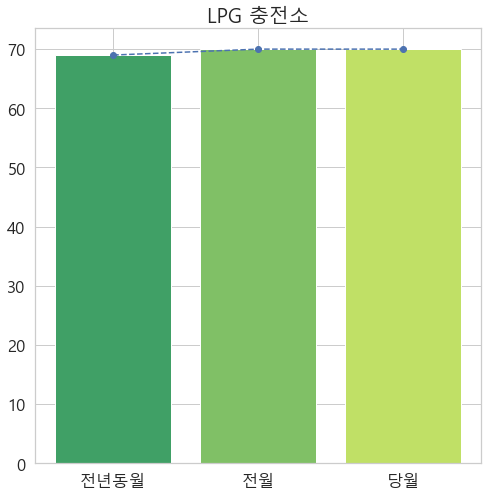

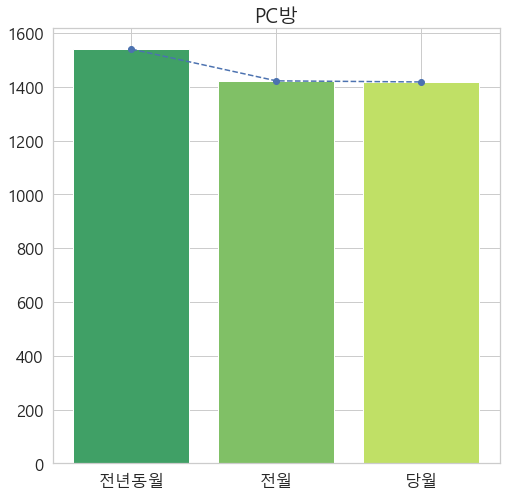

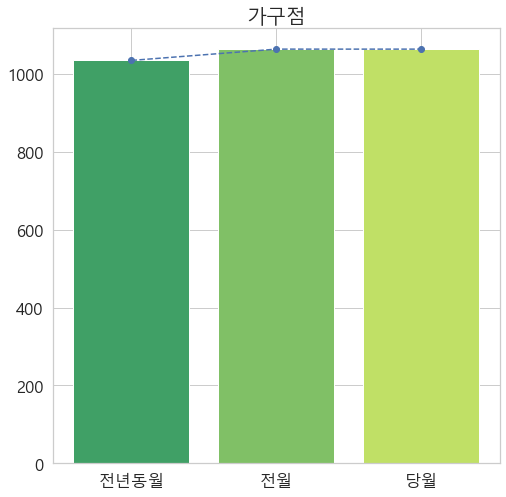

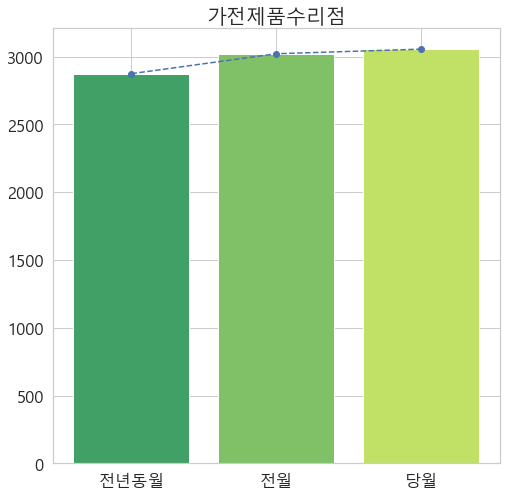

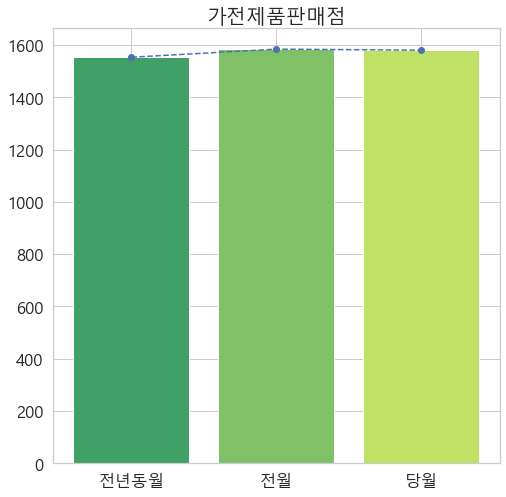

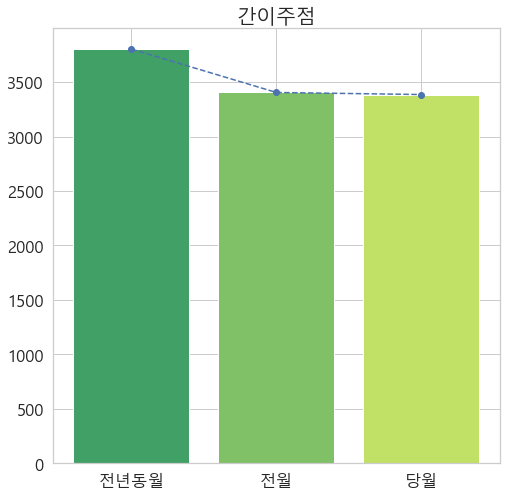

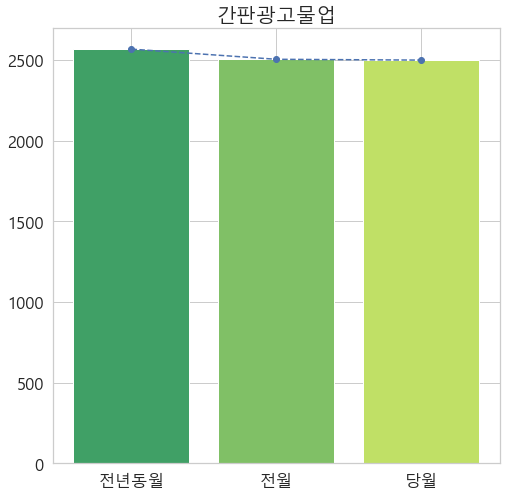

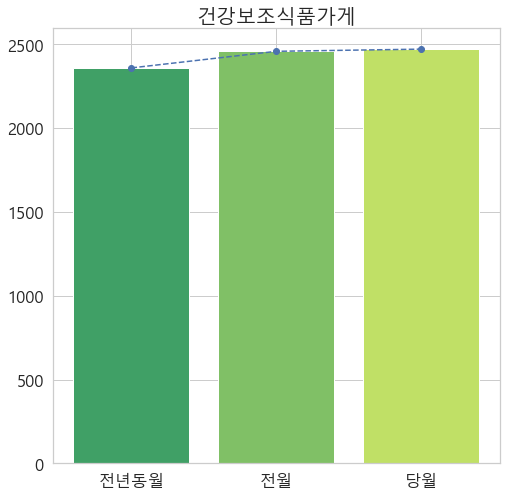

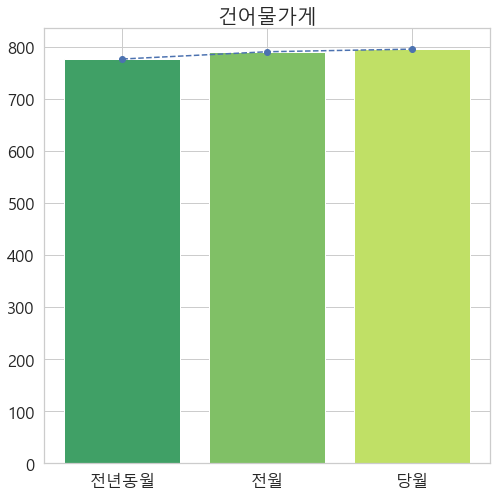

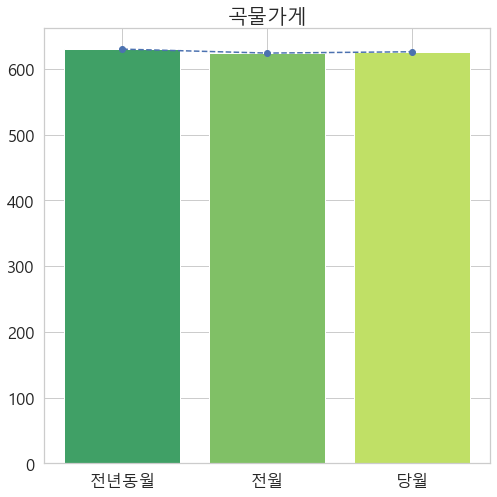

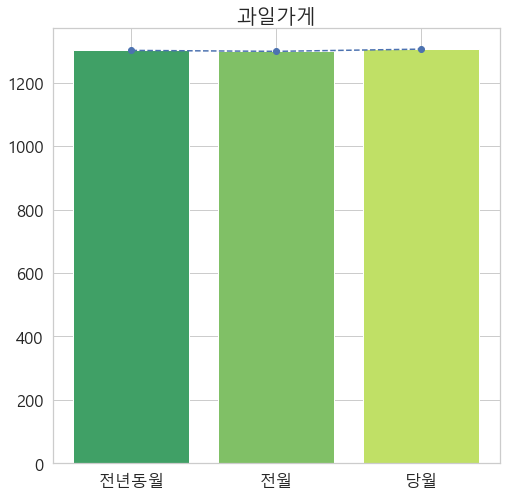

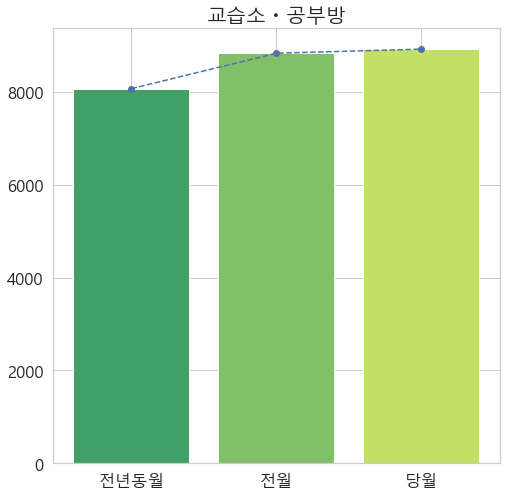

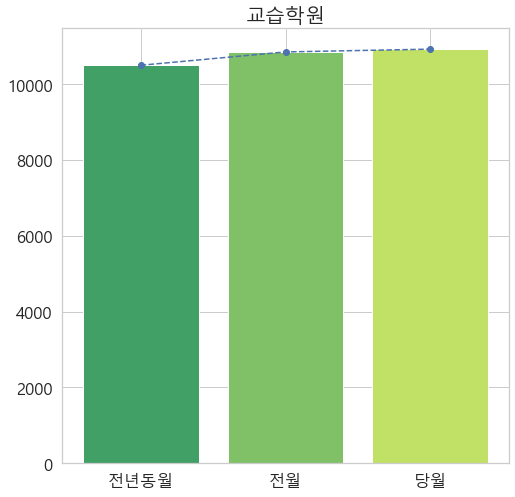

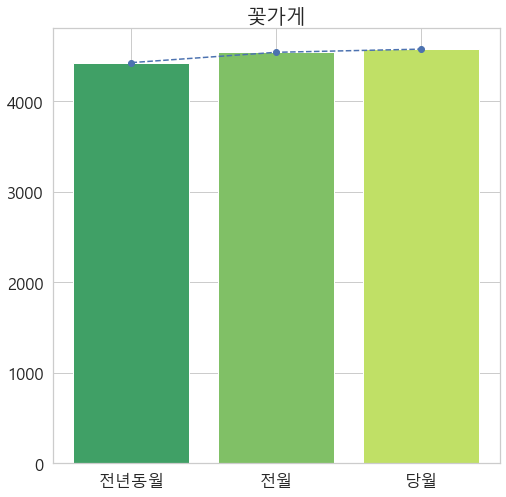

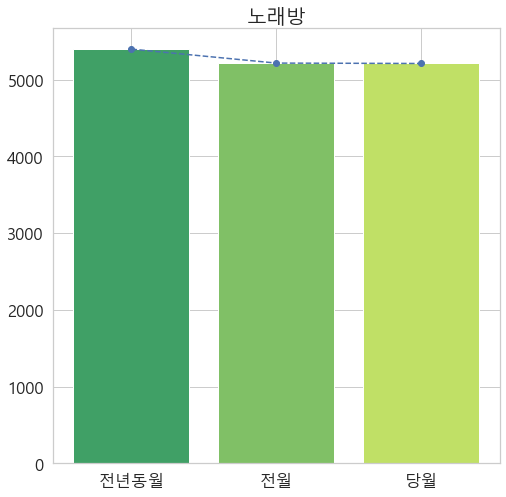

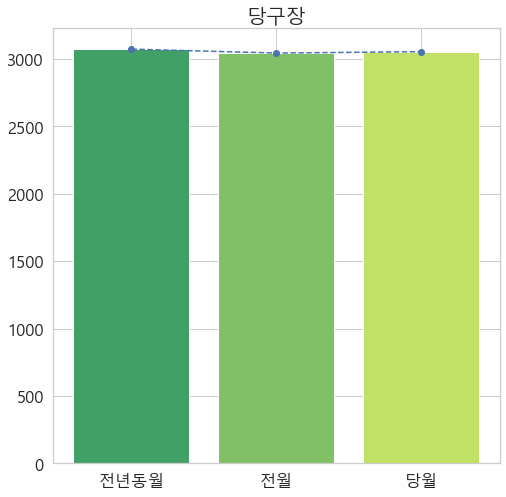

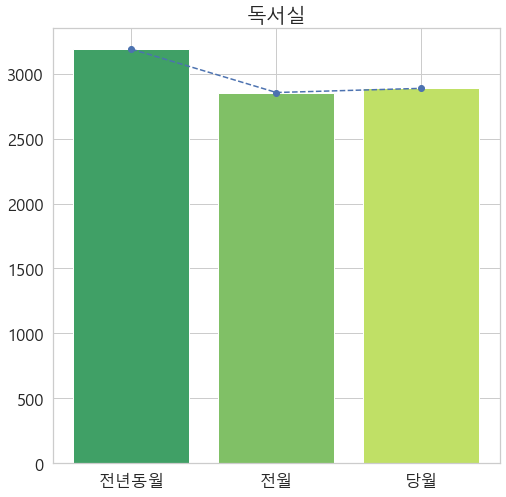

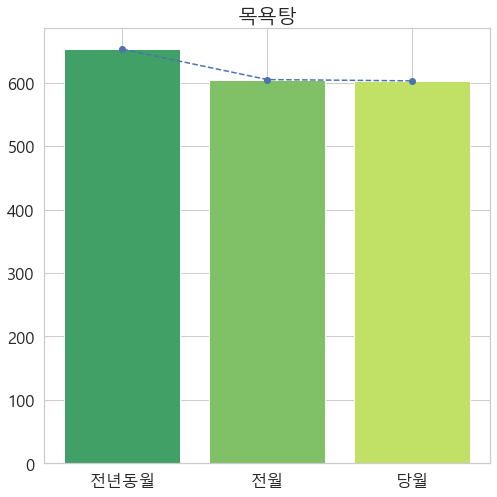

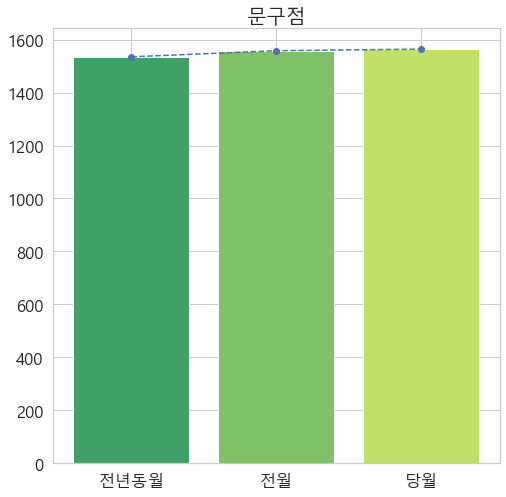

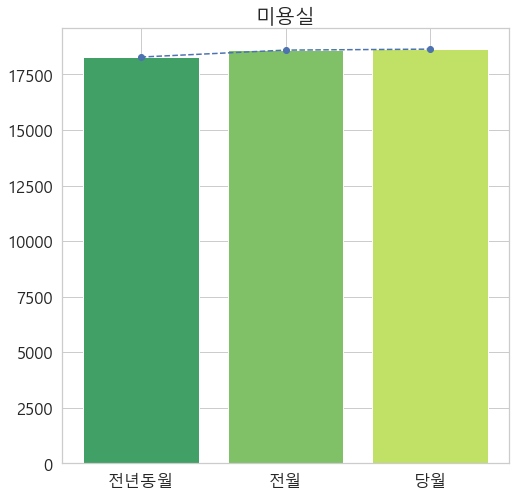

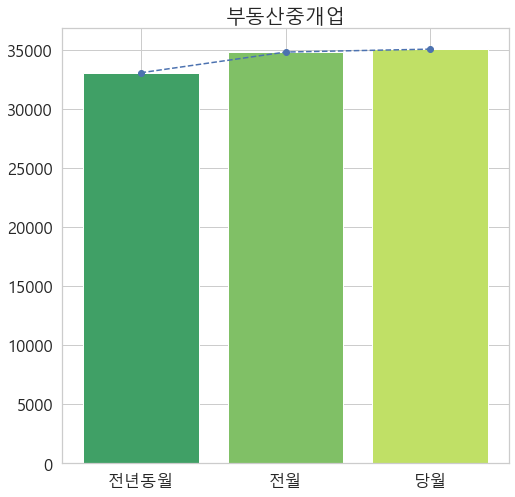

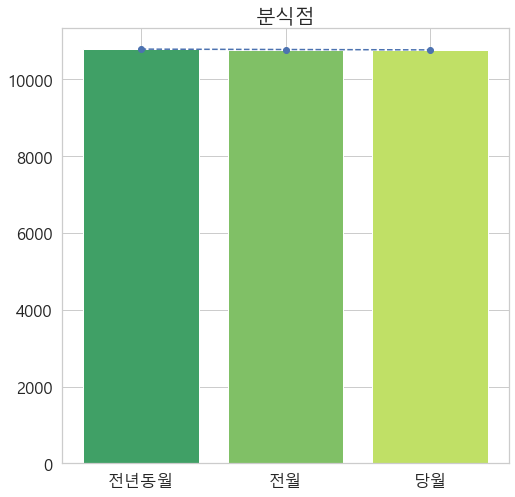

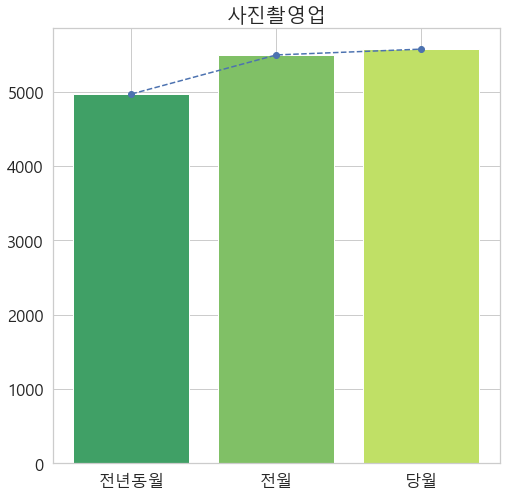

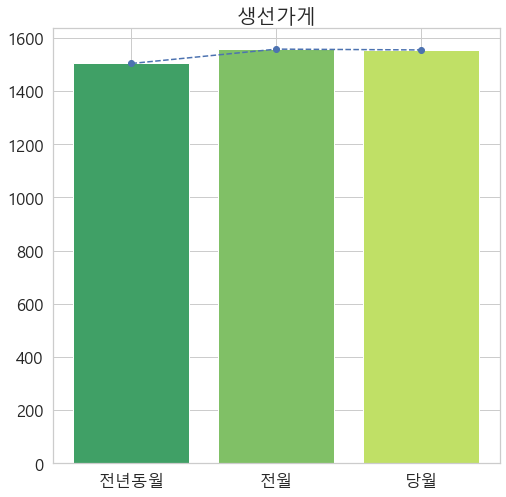

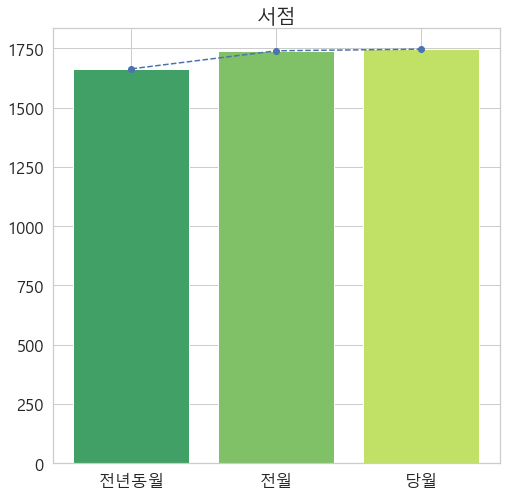

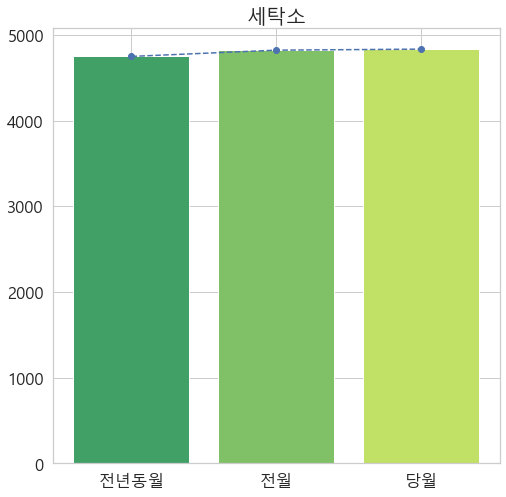

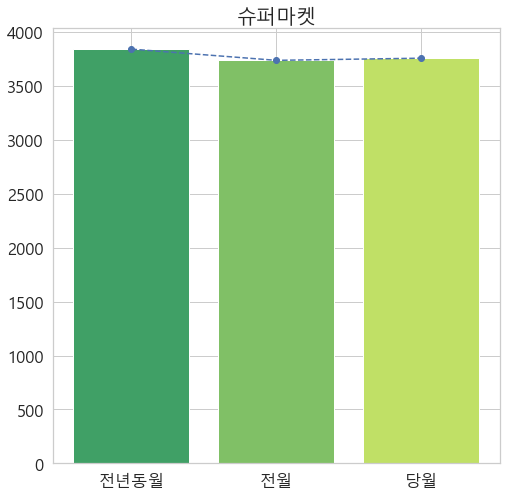

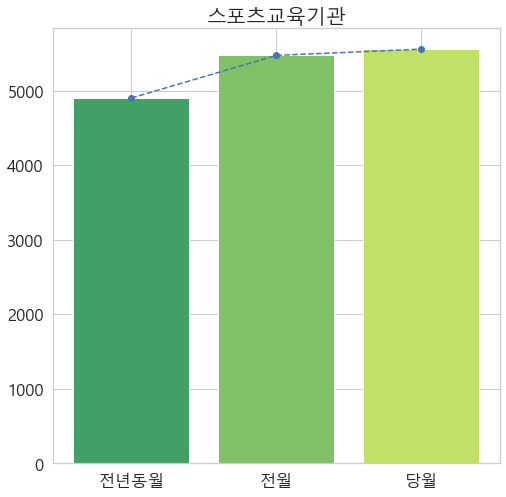

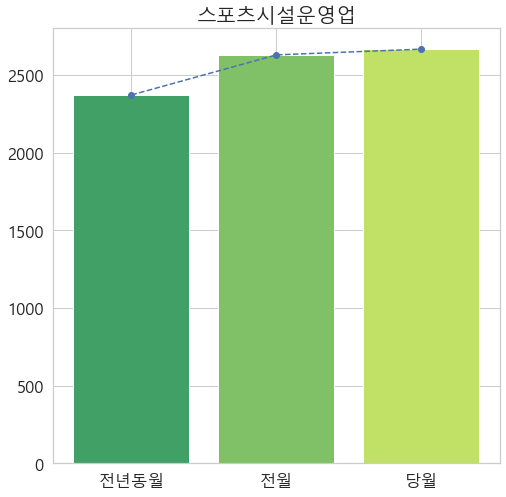

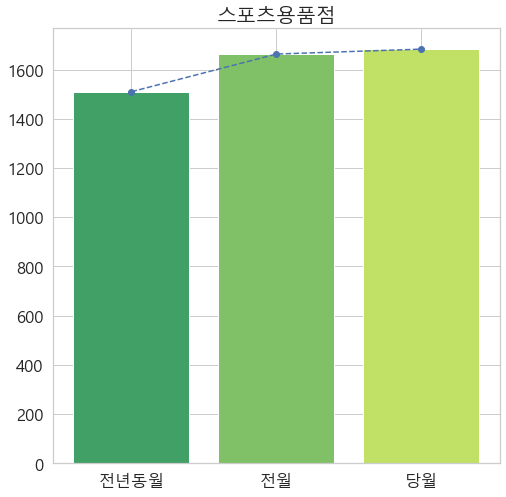

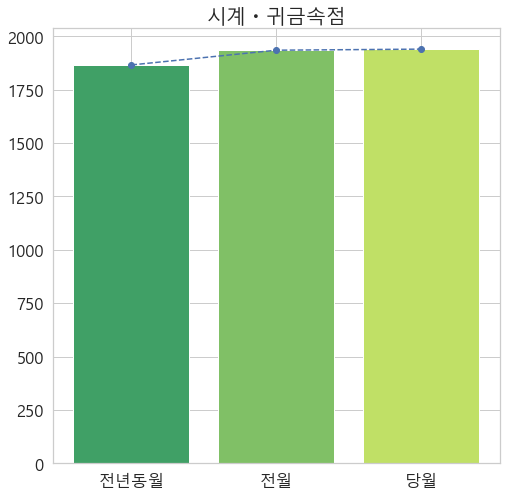

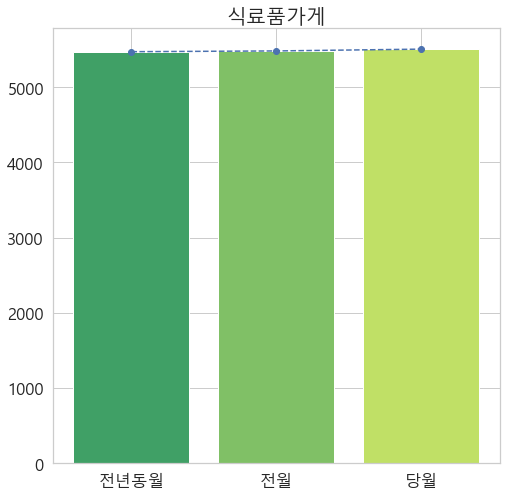

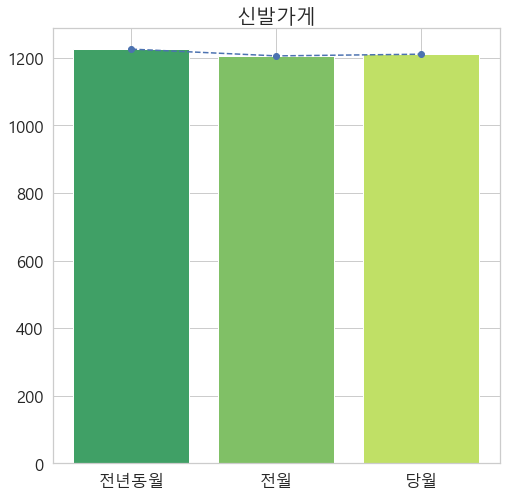

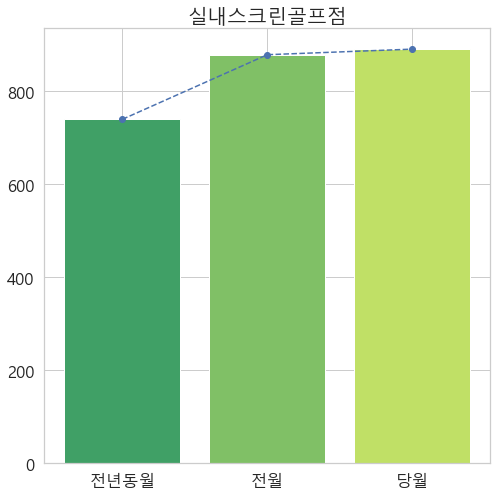

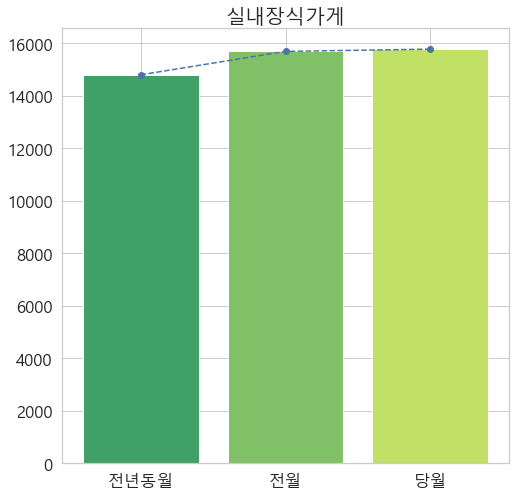

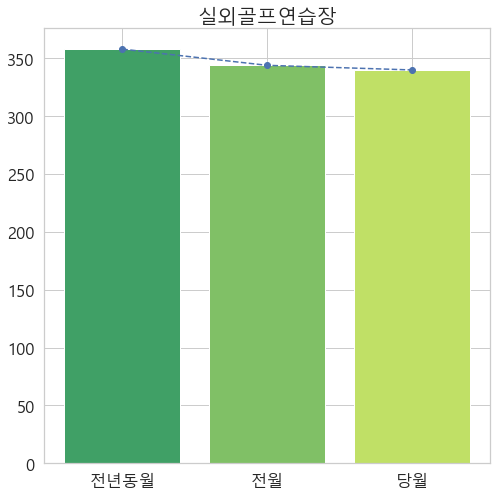

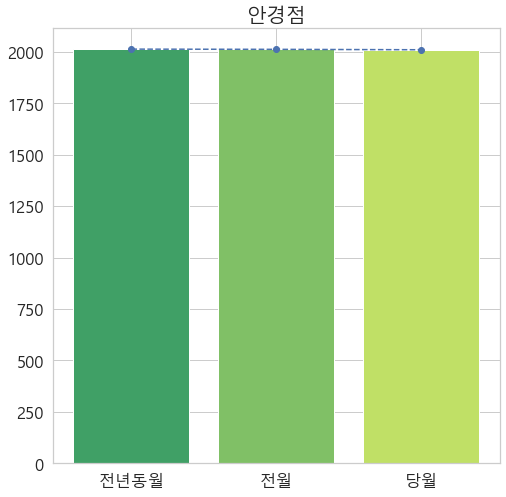

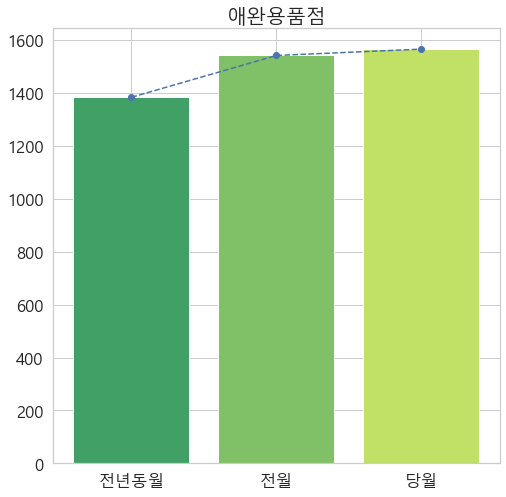

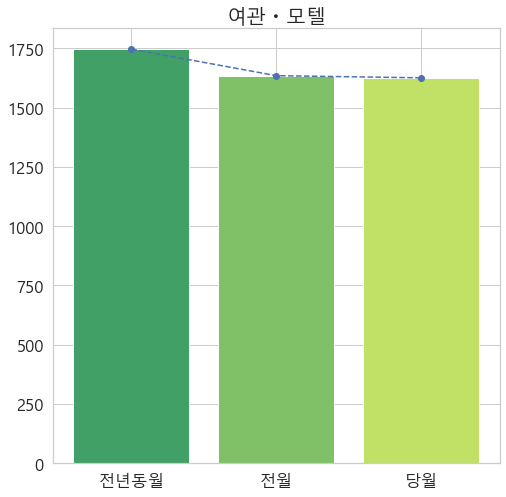

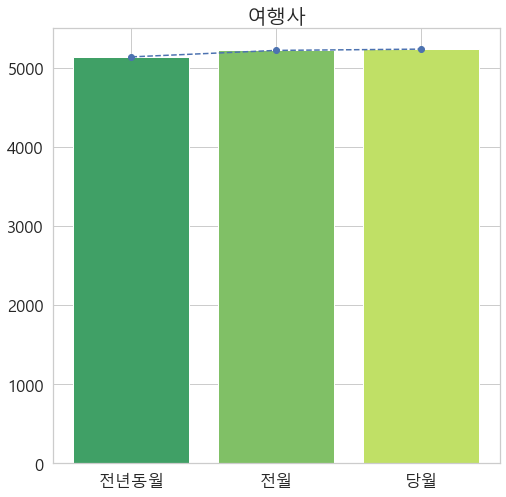

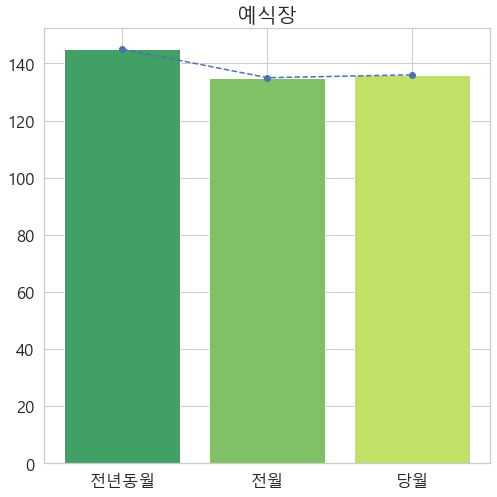

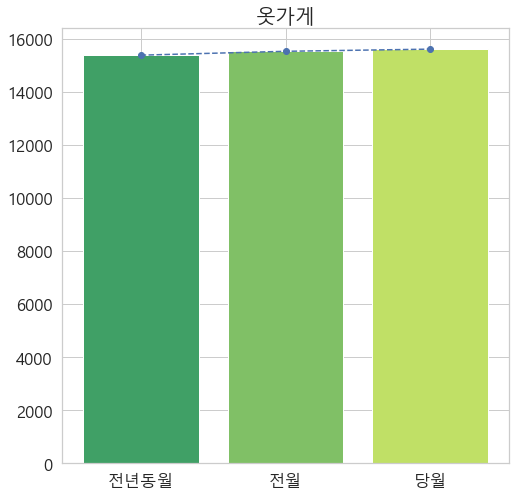

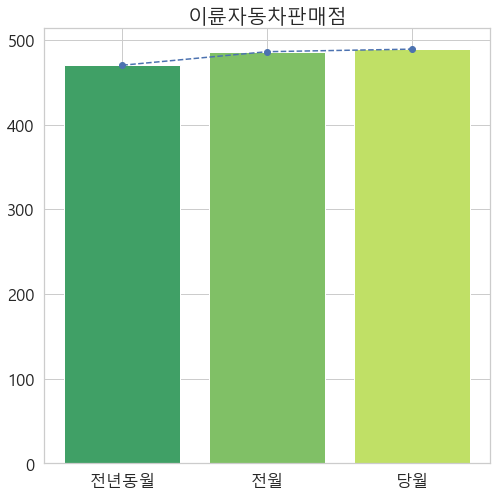

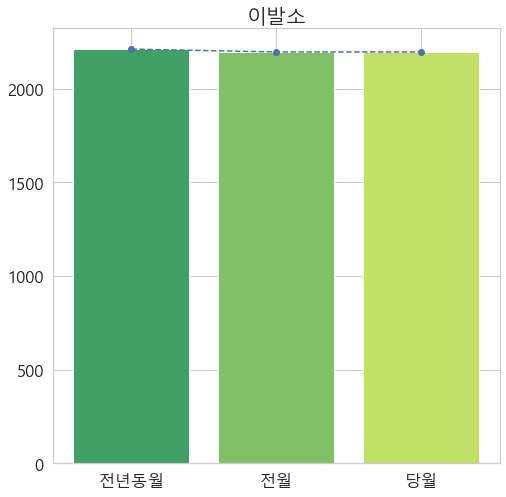

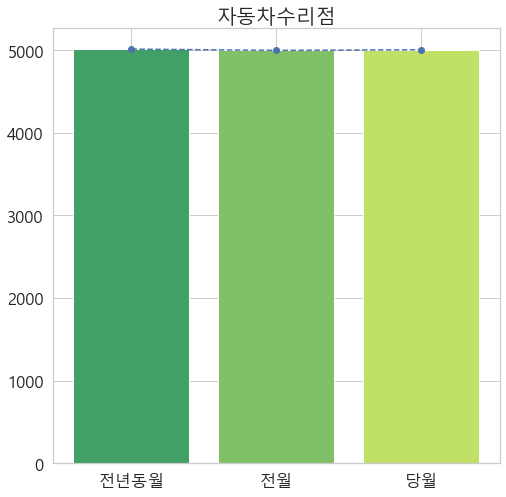

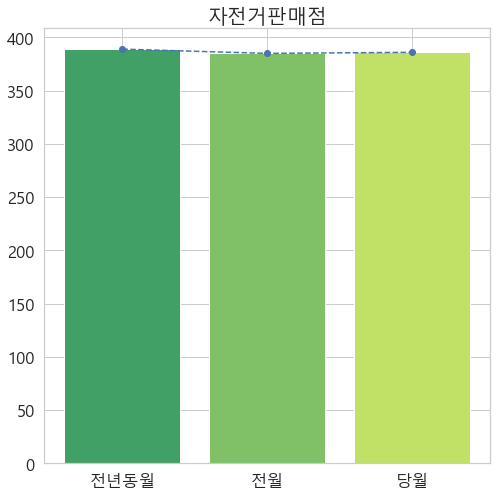

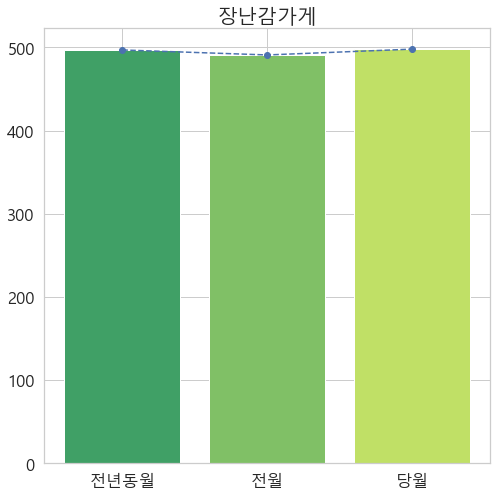

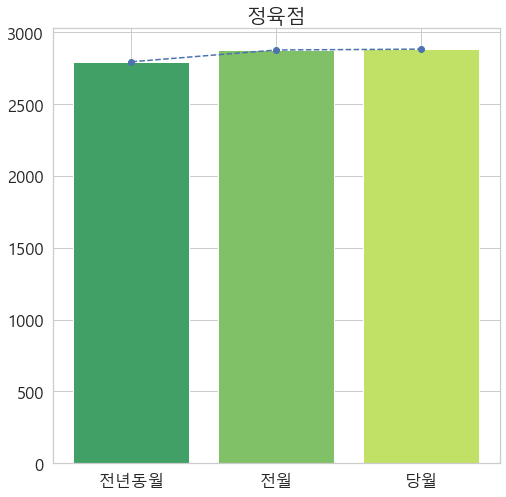

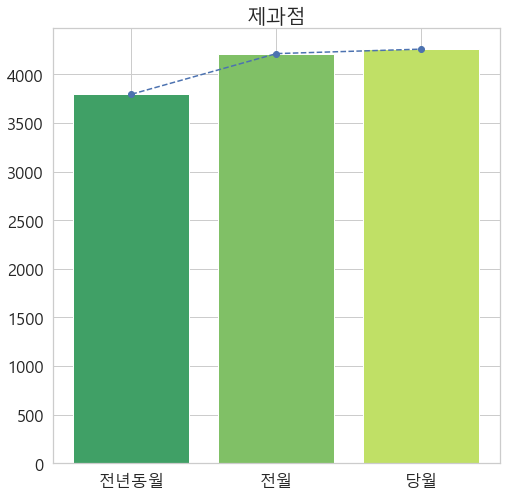

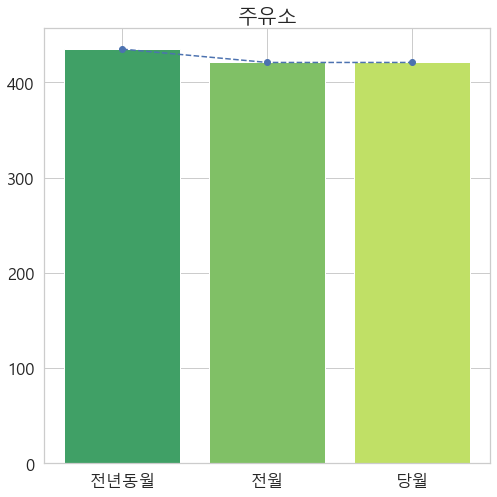

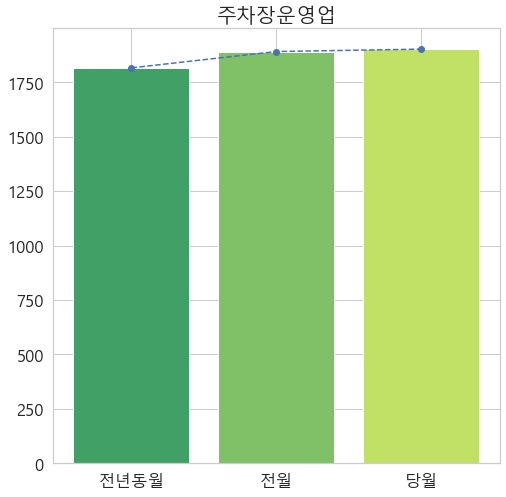

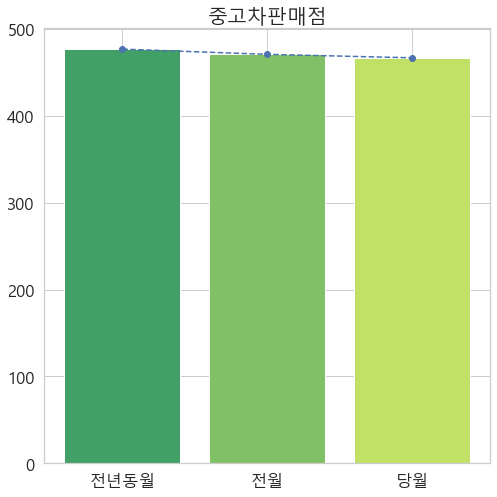

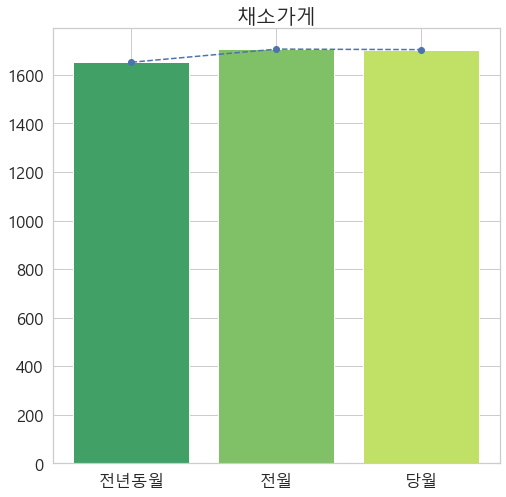

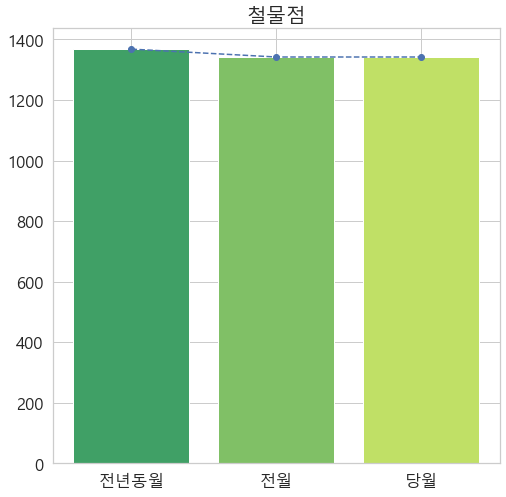

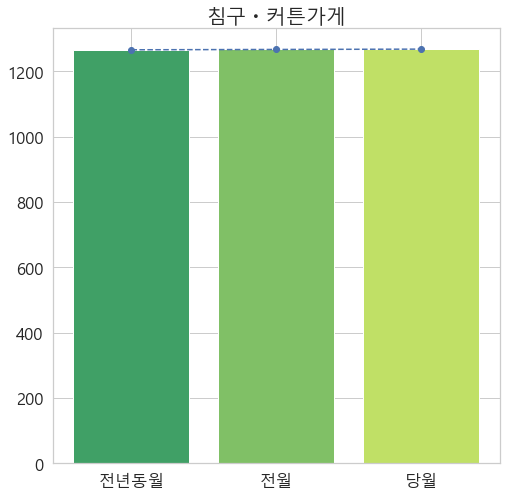

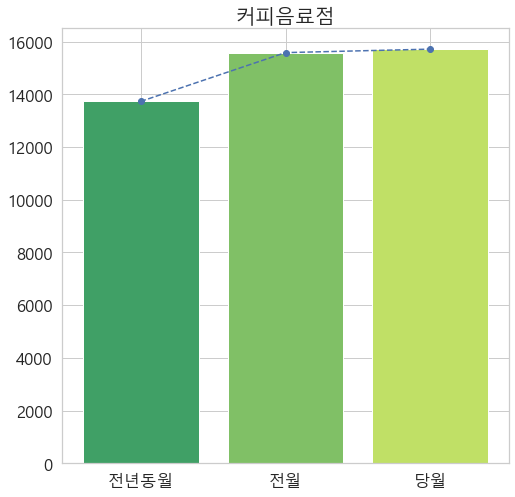

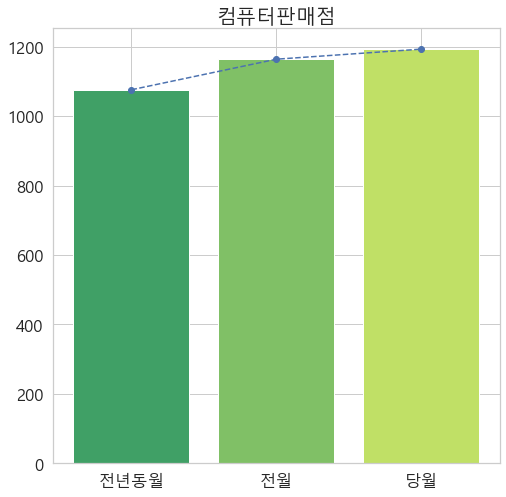

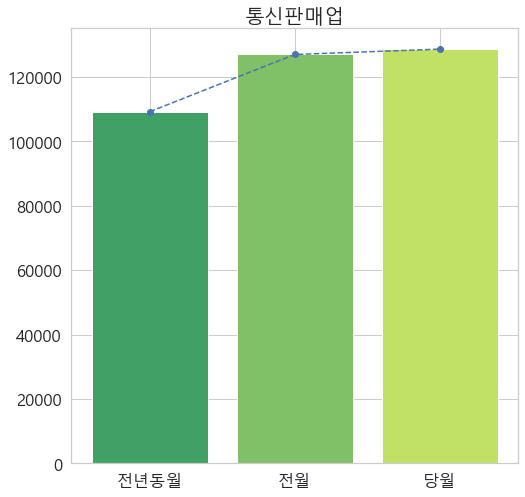

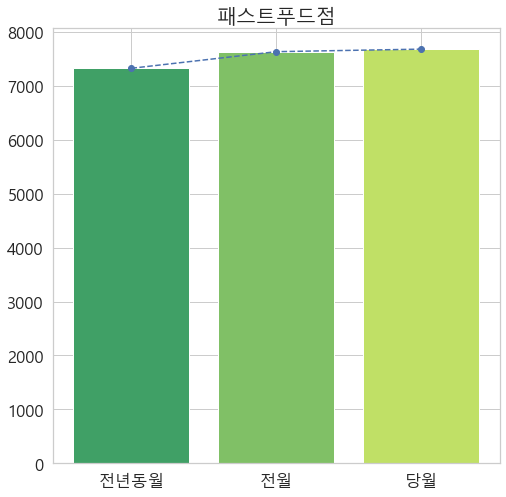

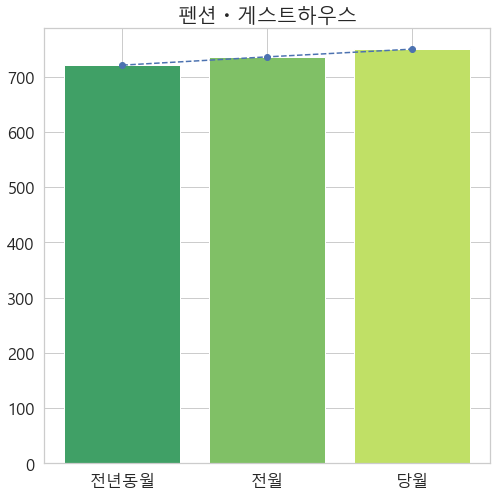

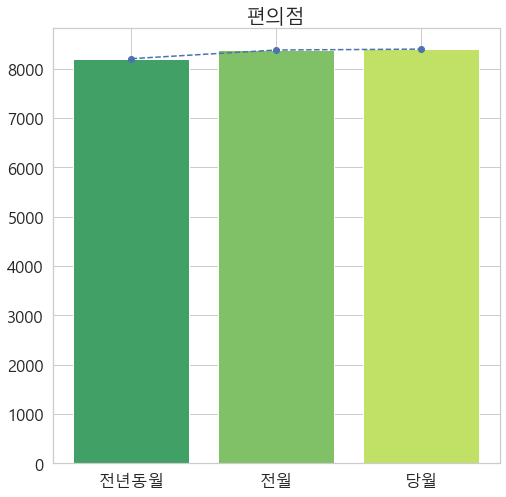

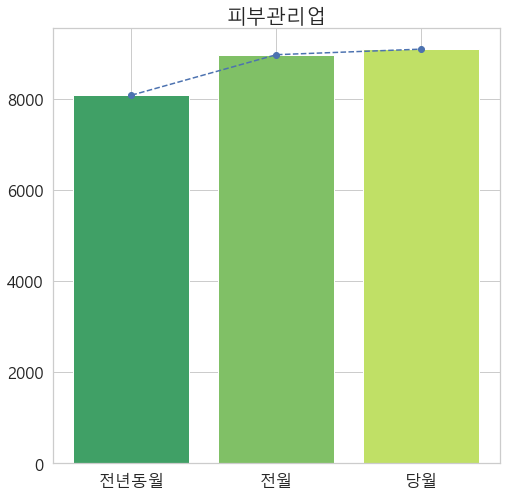

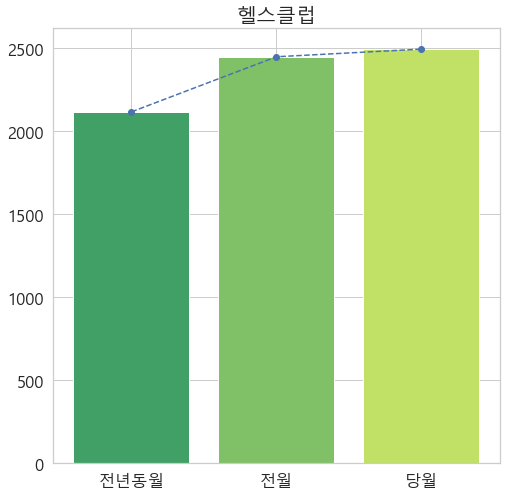

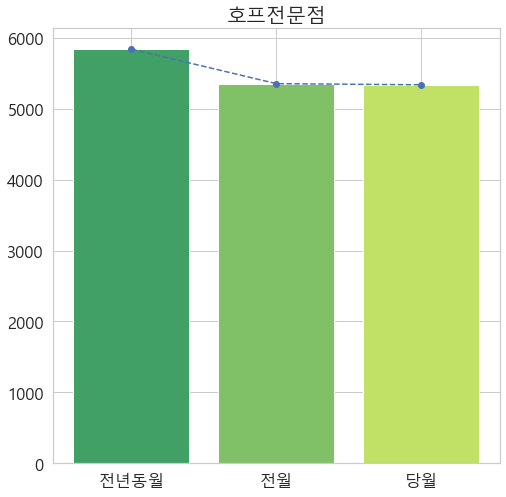

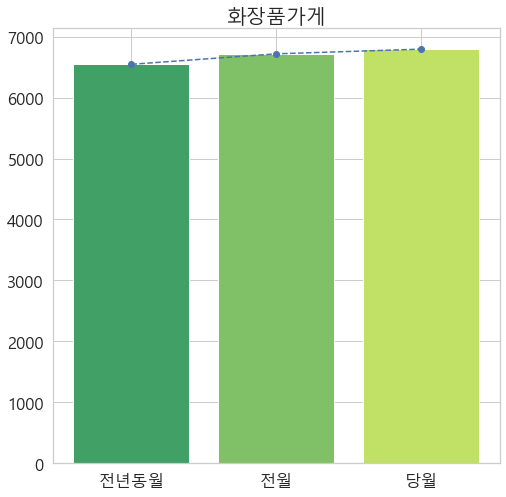

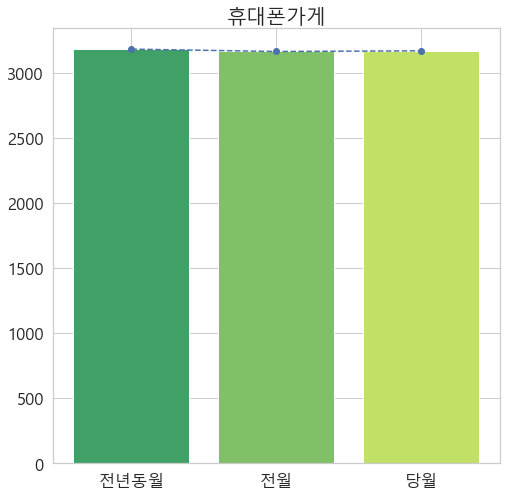

In [49]:
for i in range(66):

    day = ['전년동월', '전월','당월']
    num = bss_t.iloc[-2::-1,i].values.tolist()

    fig = plt.figure(figsize=(8,8)) ## Figure 생성 
    fig.set_facecolor('white') ## Figure 배경색 지정

    colors = sns.color_palette('summer', len(day)) ## 바 차트 색상

    xtick_label_position = list(range(len(day))) ## x축 눈금 라벨이 표시될 x좌표
    plt.xticks(xtick_label_position, day) ## x축 눈금 라벨 출력

    plt.bar(xtick_label_position, num, color=colors) ## 바차트 출력
    plt.plot(xtick_label_position, num, color='b',
             linestyle='--', marker='o') ## 선 그래프 출력
    plt.title(bss_t.columns[i], fontsize=20)
    plt.show()

In [50]:
yea_seoul

(개인)당월  (개인)전월  (개인)전년동월
업태별 존속연수별                           
건설업 10년 이상   12771   12723     12388
    1년 이상     6565    6622      6627
    20년 이상    6887    6822      6343
    2년 이상     5694    5618      6027
    30년 이상     482     461       342
...            ...     ...       ...
제조업 30년 이상    1972    1928      1571
    3년 이상     8449    8422      8213
    5년 이상    15213   15168     14710
    6개월 미만    2588    2663      3236
    6개월 이상    2875    2858      2878

[126 rows x 3 columns]

In [53]:
a = yea_seoul.reset_index()

In [55]:
a['업태별'].unique()

array(['건설업', '광업', '농·임·어업', '대리,중개,도급업', '도매업', '부동산매매업', '부동산임대업',
       '서비스업(기타포함)', '소매업', '숙박업', '운수,창고,통신업', '음식업', '전기,가스,수도업', '제조업'],
      dtype=object)